In [3]:
import pyforest 

pd.set_option("display.max_columns", 100)

<IPython.core.display.Javascript object>

In [4]:
features_df = pd.read_csv("data/training_set_features.csv", index_col='respondent_id')
labels_df = pd.read_csv("data/training_set_labels.csv", index_col='respondent_id')

print(features_df.shape)
# print(features_df.head())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(26707, 35)


In [5]:
joined_df = features_df.join(labels_df)
joined_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [6]:
features_df.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [7]:
features_df['employment_occupation'].isnull()

respondent_id
0         True
1        False
2        False
3         True
4        False
         ...  
26702     True
26703    False
26704     True
26705    False
26706     True
Name: employment_occupation, Length: 26707, dtype: bool

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

RANDOM_SEED = 6

In [9]:
numeric_cols = features_df.columns[features_df.dtypes != 'object'].values
numeric_cols

array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       'behavioral_outside_home', 'behavioral_touch_face',
       'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
       'opinion_seas_vacc_effective', 'opinion_seas_risk',
       'opinion_seas_sick_from_vacc', 'household_adults',
       'household_children'], dtype=object)

In [10]:
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

In [11]:
features_df.dtypes == 'object'

h1n1_concern                   False
h1n1_knowledge                 False
behavioral_antiviral_meds      False
behavioral_avoidance           False
behavioral_face_mask           False
behavioral_wash_hands          False
behavioral_large_gatherings    False
behavioral_outside_home        False
behavioral_touch_face          False
doctor_recc_h1n1               False
doctor_recc_seasonal           False
chronic_med_condition          False
child_under_6_months           False
health_worker                  False
health_insurance               False
opinion_h1n1_vacc_effective    False
opinion_h1n1_risk              False
opinion_h1n1_sick_from_vacc    False
opinion_seas_vacc_effective    False
opinion_seas_risk              False
opinion_seas_sick_from_vacc    False
age_group                       True
education                       True
race                            True
sex                             True
income_poverty                  True
marital_status                  True
r

In [12]:
categorical_cols = features_df.columns[features_df.dtypes == 
                                       object]
categorical_cols

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')

In [13]:
categorical_preprocessing_steps = Pipeline([
    ('encoder', OrdinalEncoder()),
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])
features_df['age_group']

respondent_id
0        55 - 64 Years
1        35 - 44 Years
2        18 - 34 Years
3            65+ Years
4        45 - 54 Years
             ...      
26702        65+ Years
26703    18 - 34 Years
26704    55 - 64 Years
26705    18 - 34 Years
26706        65+ Years
Name: age_group, Length: 26707, dtype: object

In [14]:
encoder = OrdinalEncoder()

education_encoded = encoder.fit_transform(features_df[['education']])
age_encoded = encoder.fit_transform(features_df[['age_group']])
race_encoded = encoder.fit_transform(features_df[['race']])
education_encoded, age_encoded, race_encoded

(array([[1.],
        [0.],
        [2.],
        ...,
        [3.],
        [3.],
        [3.]]),
 array([[3.],
        [1.],
        [0.],
        ...,
        [3.],
        [0.],
        [4.]]),
 array([[3.],
        [3.],
        [3.],
        ...,
        [3.],
        [1.],
        [3.]]))

In [15]:
features_df['age_group'].unique()

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [16]:
features_df['education'].unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College', nan],
      dtype=object)

In [17]:
features_df['race'].unique()

array(['White', 'Black', 'Other or Multiple', 'Hispanic'], dtype=object)

In [18]:
preprocessor = ColumnTransformer(
    transformers= [
        ('numeric', numeric_preprocessing_steps, numeric_cols),
        ('categorical', categorical_preprocessing_steps, categorical_cols)
    ],
    remainder='drop'
)

In [19]:
estimators = MultiOutputClassifier(
    estimator=RandomForestClassifier()
)

In [20]:
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('estimators', estimators)
])

In [21]:
full_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                    

In [22]:
X_train, X_eval, y_train, y_eval = train_test_split(
    features_df,
    labels_df,
    test_size=0.33,
    shuffle=True,
    stratify=labels_df,
    random_state=RANDOM_SEED
)

In [23]:
full_pipeline.fit(X_train, y_train)

preds = full_pipeline.predict_proba(X_eval)
preds

[array([[0.71, 0.29],
        [0.86, 0.14],
        [0.86, 0.14],
        ...,
        [1.  , 0.  ],
        [0.88, 0.12],
        [0.93, 0.07]]),
 array([[0.61, 0.39],
        [0.54, 0.46],
        [0.41, 0.59],
        ...,
        [0.91, 0.09],
        [0.86, 0.14],
        [0.04, 0.96]])]

In [24]:
y_preds = pd.DataFrame(
    {
        'h1n1_vaccine': preds[0][:,1],
        'seasonal_vaccine': preds[1][:,1]
    },
    index = y_eval.index
)
print(y_preds.shape)
y_preds.head()

<IPython.core.display.Javascript object>

(8814, 2)


,h1n1_vaccine,seasonal_vaccine
respondent_id,,
6728,0.29,0.39
16516,0.14,0.46
3106,0.14,0.59
16981,0.76,0.94
19111,0.23,0.72


In [25]:
def plot_roc(y_true, y_score, label_name, ax):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    ax.plot(fpr, tpr)
    ax.plot([0,1], [0,1], color='grey', linestyle = '--')
    ax.set_ylabel('TPR')
    ax.set_xlabel('FPR')
    ax.set_title(
        f"{label_name}: AUC = {roc_auc_score(y_true, y_score):.4f}"
    )

<IPython.core.display.Javascript object>

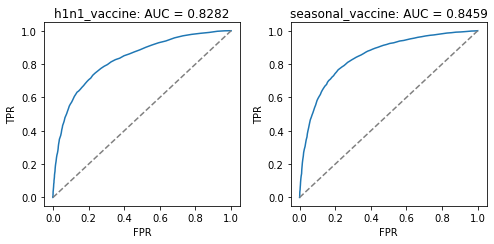

In [26]:
fig, ax = plt.subplots(1,2, figsize=(7,3.5))

plot_roc(
    y_eval['h1n1_vaccine'],
    y_preds['h1n1_vaccine'],
    'h1n1_vaccine',
    ax=ax[0]
)

plot_roc(
    y_eval['seasonal_vaccine'],
    y_preds['seasonal_vaccine'],
    'seasonal_vaccine',
    ax=ax[1]
)
fig.tight_layout()

In [27]:
roc_auc_score(y_eval, y_preds)

0.8370816912284551

In [28]:
full_pipeline.fit(features_df, labels_df)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       '...
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                    

In [29]:
test_features_df = pd.read_csv('data/test_set_features.csv', index_col='respondent_id')

<IPython.core.display.Javascript object>

In [30]:
test_probas = full_pipeline.predict_proba(test_features_df)
test_probas

[array([[0.88, 0.12],
        [0.88, 0.12],
        [0.52, 0.48],
        ...,
        [0.88, 0.12],
        [0.87, 0.13],
        [0.52, 0.48]]),
 array([[0.66, 0.34],
        [0.9 , 0.1 ],
        [0.21, 0.79],
        ...,
        [0.7 , 0.3 ],
        [0.52, 0.48],
        [0.46, 0.54]])]

In [31]:
submission_df = pd.read_csv('data/submission_format.csv', index_col='respondent_id')
submission_df.head()

<IPython.core.display.Javascript object>

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7
26710,0.5,0.7
26711,0.5,0.7


In [32]:
np.testing.assert_array_equal(test_features_df.index.values, submission_df.index.values)

<IPython.core.display.Javascript object>

In [33]:
submission_df['h1n1_vaccine'] = test_probas[0][:,1]
submission_df['seasonal_vaccine'] = test_probas[1][:,1]

submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.12,0.34
26708,0.12,0.10
26709,0.48,0.79
26710,0.52,0.85
26711,0.28,0.48


In [34]:
submission_df.to_csv('my_submission1.csv', index=True)

In [16]:
class MyClass:
    """A simple example class"""
    i = 12345

    def __init__(self):
        self.data=[1]

    def f(self):
        return 'hello world'
x=MyClass()

x.counter = 1
while x.counter < 10:
    x.counter = x.counter * 2
print(x.counter)
del x.counter

# xf = x.f
# while True:
#     print(xf())


print(x.data) # Outputs "hello world"
MyClass.i, MyClass.f, MyClass.__doc__, x.f.__class__

16
[1]


(12345, <function __main__.MyClass.f(self)>, 'A simple example class', method)